Importing pandas, numpy, seaborn python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

__Decision Tree__ is one of the most powerful and popular supervised learning algorithms. It works for both continuous as well as categorical output variables.

Gini index and information gain(entropy) both of these methods are used to select from the attributes of the dataset which attribute would be placed at the root node or the internal node.

In [2]:
#importing dataset which has been converted to dummies for doing predictive analytics
traindata = pd.read_csv("hr-total-cat-unbalanced.csv",index_col=0)

Separting target variable Y (promoted or not promoted) from the features in the dataset as X.

In [3]:
Y = traindata['is_promoted'].values
X_traindata = traindata.drop('is_promoted', axis=1)
X = X_traindata.values

In [4]:
#splitting the data into training data and test data, here test_size = 0.25 indicates 25% is assigned to test data.
#random_state variable is used so that every time same rows are selected and splitted as test data. 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [5]:
#importing decision tree classifier algorithm from scikit learn python machine library
from sklearn.tree import DecisionTreeClassifier

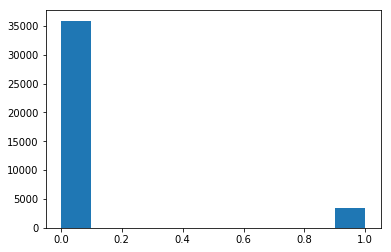

In [6]:
#plotting target variable count to know whether it is balanced or imbalanced
plt.hist(Y_train)
plt.show()

Here dataset predictor variable is unbalanced size, we need to assign class weight so that minority samples get more penality weightage if they are predicted incorrect compared to majority sample.

In [7]:
#importing class_weight function to assign majority and minority class weight
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
class_weightsl = class_weights.tolist()
class_weightsl

[0.5476144027646174, 5.75051214515657]

In [8]:
#will vary step depth between 10 to 34 keeping min_samples_leaf constant
# Setup arrays to store train and test accuracies
depth = np.arange(10, 34, 2)
train_accuracy = np.empty(len(depth))
test_accuracy = np.empty(len(depth))

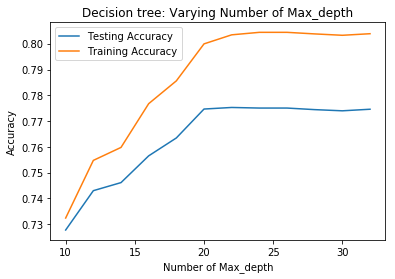

In [9]:
# Create instance (i.e. object) of Decision Tree classifier
# Loop over different values of k (depth)
for i, k in enumerate(depth):
    # Setup a Decision Tree classifier Classifier with max depth k
    clf_ent = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                max_depth=k, min_samples_leaf=25,class_weight={0:0.547614402764617, 1:5.75051214515657})
    
    clf_ent.fit(X_train,Y_train)
     #Compute accuracy on the training set
    train_accuracy[i] = clf_ent.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf_ent.score(X_test, Y_test)

# Generate plot
plt.title('Decision tree: Varying Number of Max_depth')
plt.plot(depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Max_depth')
plt.ylabel('Accuracy')
plt.show()

We need to choose the value of max_depth value where highest value of accuracy for test data is obtained

In [10]:
#will vary min_samples_leaf between 10 to 34 keeping depth of decision tree as constant
# Setup arrays to store train and test accuracies
samples = np.arange(10, 66,3)
train_accuracy = np.empty(len(samples))
test_accuracy = np.empty(len(samples))

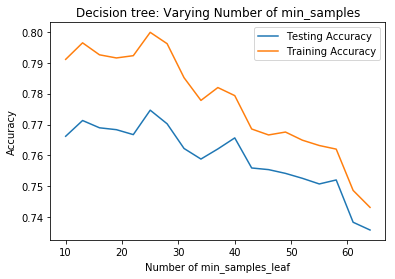

In [11]:
# Create instance (i.e. object) of Decision Tree classifier
# Loop over different values of k (min_samples_leaf)
for i, k in enumerate(samples):
    # Setup a decision tree Classifier with k min_samples_leaf
    clf_ent = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                max_depth=20, min_samples_leaf=k, class_weight={0:0.547614402764617, 1:5.75051214515657})
    
    clf_ent.fit(X_train,Y_train)
     #Compute accuracy on the training set
    train_accuracy[i] = clf_ent.score(X_train, Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf_ent.score(X_test, Y_test)

# Generate plot
plt.title('Decision tree: Varying Number of min_samples')
plt.plot(samples, test_accuracy, label = 'Testing Accuracy')
plt.plot(samples, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

We choose the value of min_samples_leaf &  depth of decision tree classifier parameters where we get highest value of accuracy for the test data of samples.

We have got highest acccuracy for the combination of decision tree classifier for parameters of max_depth as 20 and min_samples_leaf as 25.

In [12]:
#defining decision tree classifier
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                max_depth=20, min_samples_leaf=25, class_weight={0:0.547614402764617, 1:5.75051214515657})

In [13]:
#fit the decision tree classifier for the train data set
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.547614402764617, 1: 5.75051214515657},
            criterion='entropy', max_depth=20, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=25,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [14]:
#performing cross validation on the dataset by specifying cv = 10.
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(clf_entropy, X_train, Y_train, cv=10)
print(cv_results)

[0.7585856  0.76876113 0.75521628 0.78142494 0.78142494 0.75928753
 0.76590331 0.77398829 0.76457114 0.76737083]


In [15]:
#mean value of cross validation for 10 iterations
np.mean(cv_results)

0.7676533990720367

In [16]:
#predicting predictor for train data
y_pred_train = clf_entropy.predict(X_train)

#predicting predictor for test data
y_pred_test = clf_entropy.predict(X_test)

In [17]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/HR-Analytics-Practice-Dataset/master/attachements/Confusion-matrix.png",width=600)

In [18]:
#confusion matrix for train data
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_pred_train)

array([[28322,  7560],
       [  302,  3115]], dtype=int64)

In [19]:
#confusion matrix for test data
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred_test)

array([[9269, 2702],
       [ 250,  879]], dtype=int64)

In [20]:
#importing classification matrix and accuracy score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

classification report for train data

In [21]:
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/HR-Analytics-Practice-Dataset/master/attachements/precision-recall-f1score.png",width=500)

In [22]:
print(classification_report(Y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     35882
           1       0.29      0.91      0.44      3417

   micro avg       0.80      0.80      0.80     39299
   macro avg       0.64      0.85      0.66     39299
weighted avg       0.93      0.80      0.84     39299



classification report for test data

In [23]:
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     11971
           1       0.25      0.78      0.37      1129

   micro avg       0.77      0.77      0.77     13100
   macro avg       0.61      0.78      0.62     13100
weighted avg       0.91      0.77      0.82     13100



In [24]:
print("Accuracy score for train data:",accuracy_score(Y_train, y_pred_train))
print("Accuracy score for test data:",accuracy_score(Y_test, y_pred_test))

Accuracy score for train data: 0.7999440189317795
Accuracy score for test data: 0.7746564885496183


In [25]:
#importing roc_auc_score and roc_curve functions from sklearn library
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

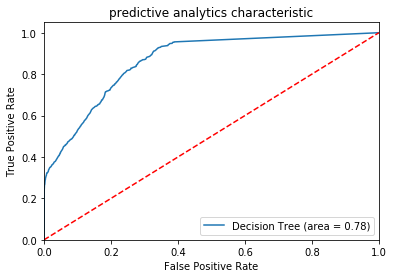

In [26]:
#plotting roc curve to plot false positive rate vs true positive rate
clf_entropy_roc_auc = roc_auc_score(Y_test, clf_entropy.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, clf_entropy.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % clf_entropy_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('predictive analytics characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Finding out predictor for Test Data

In [28]:
X_testdata = pd.read_csv("test-hr-total-cat1.csv",index_col=0)

In [29]:
#already test data features were converted to 
X_testdata1 = X_testdata.values

In [30]:
#fitting decision tree classifier for whole train data
clf_entropy.fit(X, Y)

DecisionTreeClassifier(class_weight={0: 0.547614402764617, 1: 5.75051214515657},
            criterion='entropy', max_depth=20, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=25,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [31]:
final_prediction_unknown = clf_ent.predict(X_testdata1)
final_prediction_unknown[0:100]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [32]:
#converting array to dataframe to display employee id beside prediction whetehr promoted or not promoted
final_prediction_unknown = final_prediction_unknown.tolist()
X_testdata['prediction']=final_prediction_unknown
final = X_testdata['prediction']

In [33]:
final[0:25]

employee_id
8724     1
74430    0
72255    0
38562    0
64486    0
46232    0
54542    0
67269    0
66174    0
76303    1
60245    1
42639    0
30963    0
54055    0
42996    1
12737    1
27561    0
26622    1
31582    0
29793    0
72735    0
5677     1
60889    0
51498    1
8566     0
Name: prediction, dtype: int64

In [34]:
final.to_csv('test-data-prediction-decision-tree-model.csv')